In [1]:
import pandas as pd

data = pd.read_csv("/content/Mall_Customers.csv")
display(data.describe())
display(data.info())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None

## Check for nulls and duplicates

Check for nulls and duplicates in the dataset.


In [2]:
null_counts = data.isnull().sum()
print("Null values per column:")
print(null_counts)

duplicate_counts = data.duplicated().sum()
print("\nNumber of duplicate rows:")
print(duplicate_counts)

Null values per column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Number of duplicate rows:
0


## Drop unneeded columns

Drop the 'CustomerID' column from the dataset.


In [3]:
data.drop('CustomerID', axis=1, inplace=True)
display(data.head())

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Select features


Select 'Annual Income (k$)' , 'Spending Score (1-100)' and 'Age' as features.


**Reasoning**:
Create a new DataFrame with the selected features and display the first few rows.



In [4]:
features = data[['Annual Income (k$)', 'Spending Score (1-100)','Age']]
display(features.head())

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


## Scale data

Scale the selected features using StandardScaler.


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Create scatter plot (income vs spending score)

Generate a scatter plot to visualize the relationship between 'Annual Income (k$)' and 'Spending Score (1-100)'.


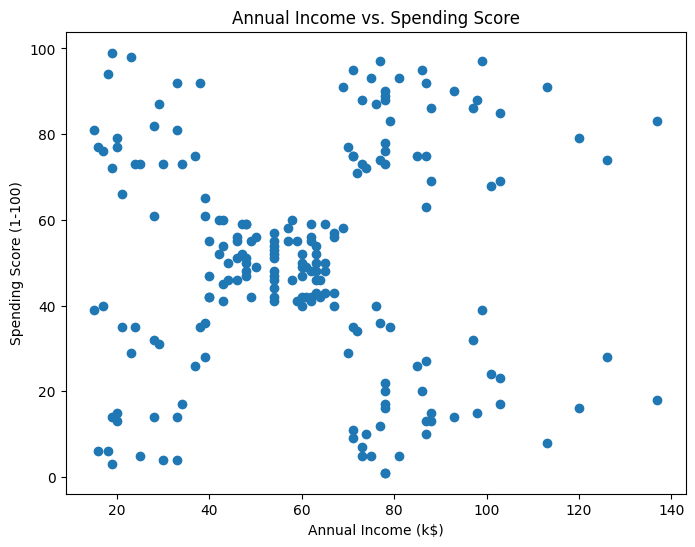

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Visualize gender distribution

Create a visualization to show the distribution of gender in the dataset (e.g., bar plot).


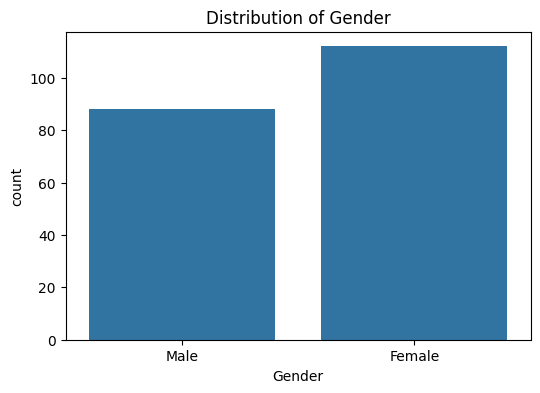

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

## Visualize income vs spending score by gender

Create a scatter plot of 'Annual Income (k$)' and 'Spending Score (1-100)' with different colors or markers for each gender to explore potential patterns related to gender.


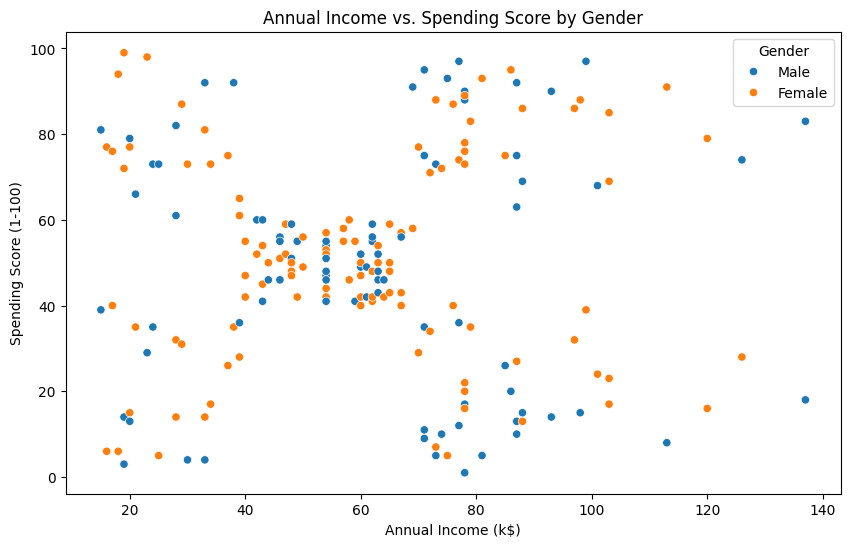

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Determine optimal number of clusters using the elbow method

Calculate the inertia for different numbers of clusters and plot it to find the elbow point.


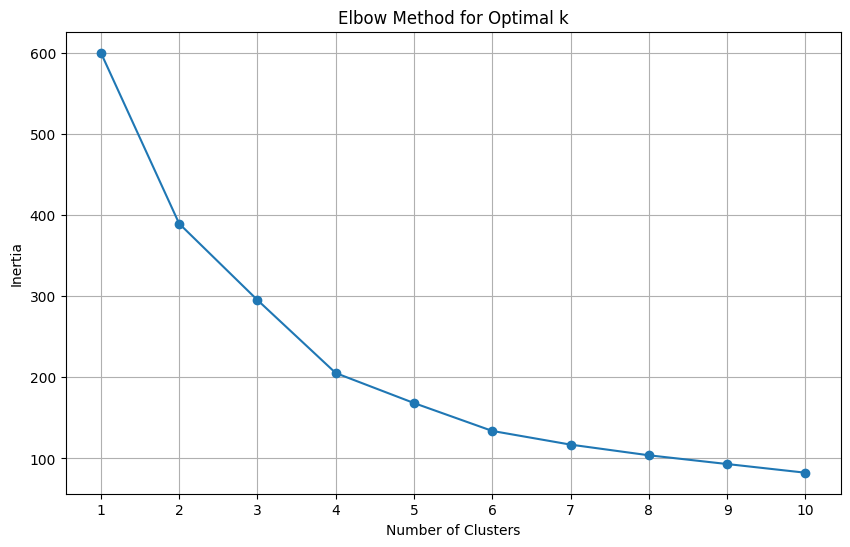

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Apply k-means clustering

Apply the K-Means algorithm to the scaled features using the optimal number of clusters found in the previous step.


Instantiate and fit the KMeans model to the scaled features using the optimal number of clusters (5, determined visually from the elbow plot in the previous step).



In [11]:
kmeans_model = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_model.fit(scaled_features)

KMeans(n_clusters=5, n_init=10, random_state=42)

## Add cluster labels to the dataframe

Add a new column to the original dataframe containing the cluster label for each customer.


In [12]:
data['Cluster_Label'] = kmeans_model.labels_
display(data.head())

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Label
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,0
3,Female,23,16,77,1
4,Female,31,17,40,1


## Visualize the clusters

Create a scatter plot of 'Annual Income (k$)' and 'Spending Score (1-100)' and color the points based on their cluster labels. Plot the centroids of the clusters as well.


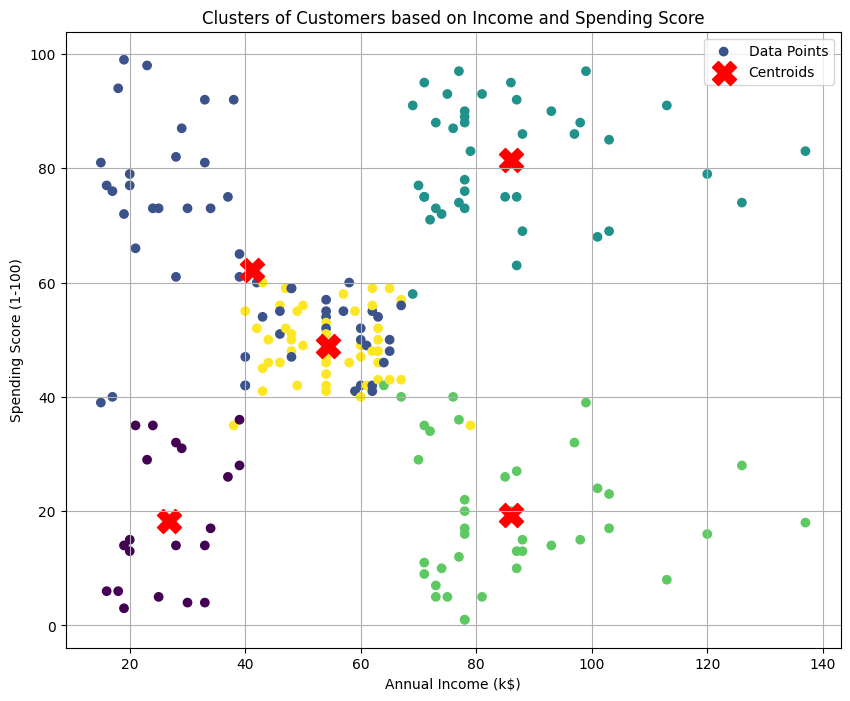

In [13]:
plt.figure(figsize=(10, 8))

# Scatter plot of data points colored by cluster label
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster_Label'], cmap='viridis', label='Data Points')

# Inverse transform centroids and plot them
centroids = scaler.inverse_transform(kmeans_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters of Customers based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

# bonus

## Analyze Cluster Metrics

Group the data by clusters and calculate the mean annual income, mean spending score, and count of customers per cluster.

In [15]:
# Group data by cluster label and calculate mean income, mean spending score, and count
cluster_analysis = data.groupby('Cluster_Label').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Gender': 'count' # Assuming CustomerID was not dropped, if dropped, use another column like 'Gender' or 'Age'
}).rename(columns={'Gender': 'Customer_Count'})

display(cluster_analysis)

,Annual Income (k$),Spending Score (1-100),Customer_Count
Cluster_Label,,,
0,26.750000,18.350000,20
1,41.092593,62.240741,54
2,86.100000,81.525000,40
3,86.102564,19.358974,39
4,54.382979,48.851064,47
